In [8]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import pandas as pd
df = pd.read_csv('/content/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [12]:
df.corr(numeric_only=True)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [13]:
df.info()
X= df['health']
Y= df['income']
import numpy as np
data = np.array(list(zip(X,Y)))
data
X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


,health
0,7.58
1,6.55
2,4.17
3,2.85
4,6.03
...,...
162,5.25
163,4.91
164,6.84
165,5.18


In [14]:
#Same thing using index Loaction
xx= df.iloc[:,[3,5]]
xx

,health,income
0,7.58,1610
1,6.55,9930
2,4.17,12900
3,2.85,5900
4,6.03,19100
...,...,...
162,5.25,2950
163,4.91,16500
164,6.84,4490
165,5.18,4480


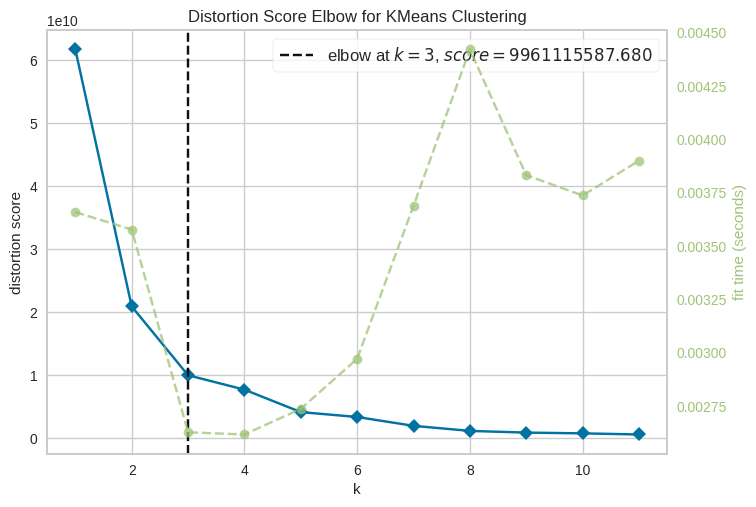

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
from yellowbrick.cluster import KElbowVisualizer
model =  KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(xx)
visualizer.show()

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(xx)

In [18]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 0, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [19]:
#We assign the labels to each row in dataframe.
df["Clus_km"] = kmeans.labels_
df.head(15)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clus_km
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,1
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,1


In [20]:
kmeans.cluster_centers_

array([[3.80200000e+00, 8.89200000e+04],
       [6.34425197e+00, 8.38553543e+03],
       [8.95685714e+00, 3.86742857e+04]])

In [21]:
#Get each cluster size,
from collections import Counter
Counter(kmeans.labels_)

Counter({np.int32(1): 127, np.int32(2): 35, np.int32(0): 5})

In [22]:
from sklearn import metrics
clusters = kmeans.labels_.tolist()

ClusterCentroid=kmeans.cluster_centers_
clustervalidation=metrics.silhouette_score(xx,clusters, metric='euclidean')
print(clustervalidation)

0.696607038870568


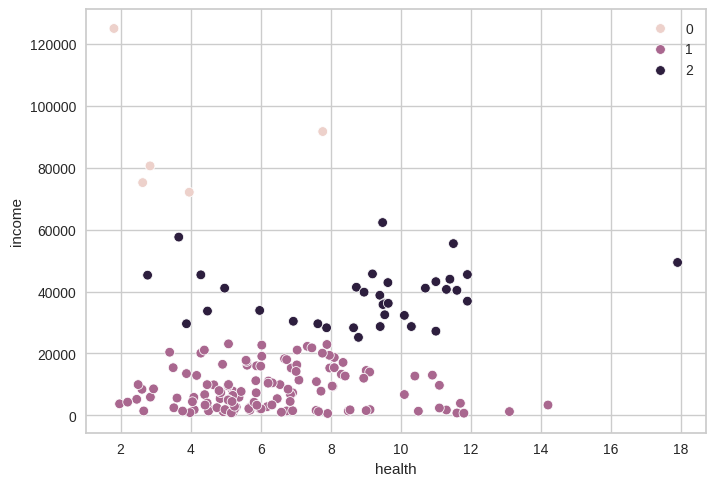

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=xx, x="health", y="income", hue=kmeans.labels_)
plt.show()

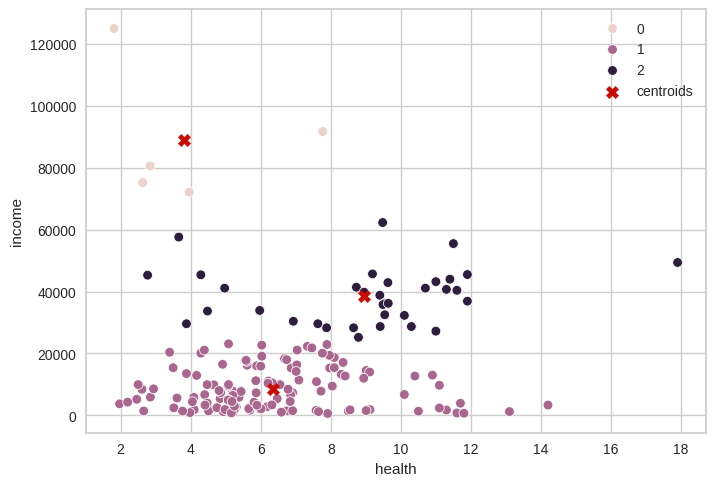

In [24]:
sns.scatterplot(data=xx, x="health", y="income", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [25]:
newdata = [[85.89,30400],[10,10000],[15,1700],[3,6000]]
d=pd.DataFrame(newdata,columns=['health','income'])
#d=[[15,1700]]
predictedClusters=kmeans.predict(d)
print(len(predictedClusters))
print(d)
print(predictedClusters)

4
   health  income
0   85.89   30400
1   10.00   10000
2   15.00    1700
3    3.00    6000
[2 1 1 1]
